In [135]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

In [136]:
data_downsampled = np.genfromtxt('data_cruz_downsampled.csv', delimiter=',')

In [137]:
data_downsampled.shape

(844, 3)

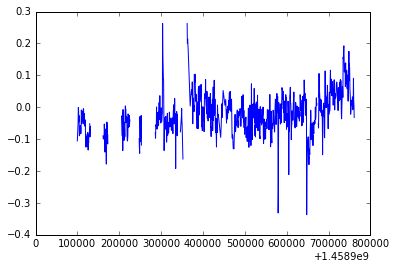

In [138]:
plt.plot(data_downsampled[:,0], data_downsampled[:,1])

In [139]:
%%capture
data = np.genfromtxt('data_cruz_00000.csv', delimiter=',', usecols=(0,1,2), invalid_raise=False, loose=True);

In [140]:
data.shape

(184261, 3)

In [141]:
data[0]

array([  1.45945647e+09,  -6.45800000e-01,   7.15638310e+17])

In [142]:
# data = np.array([d for d in data if not d[1] == 0])
# print data.shape                 

# Mode

In [143]:
from scipy.stats import mode

In [144]:
modes = []
tweetids = []
tweets = 0
min_tweets = 100
prev_time = data[0,0]
R = 10*60

for row in data:
    tweets += 1
    if not row[1] == 0:
        tweetids.append(row[2])
    time_diff = float(row[0]) - prev_time
    if time_diff > R:
#         if int(time_diff / R) > 1:
#             modes.append([row[0]-(time_diff*0.5), None, None, None])
        if time_diff > R and tweets > min_tweets:
            m = mode(tweetids)
            modes.append([row[0]-(R*0.5), m[0][0], m[1][0], m[1][0]/len(tweetids), len(tweetids)])
        tweetids = []
        prev_time = float(row[0])
        tweets = 0

In [145]:
np.array(modes).shape

(334, 5)

In [146]:
modes = np.array(modes)

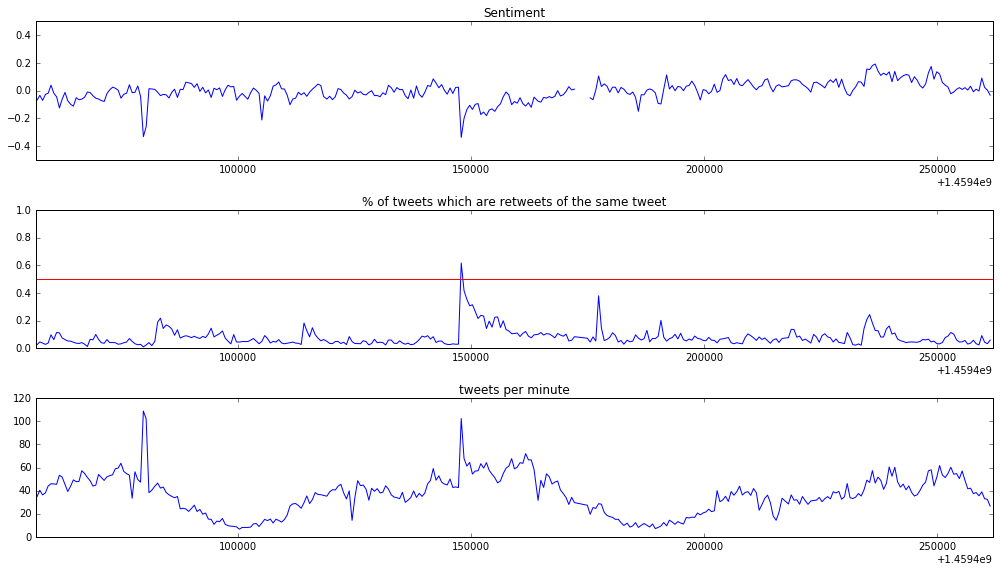

In [149]:
# threshold = np.nanstd(modes[:,3]) * 3
threshold = 0.5

plt.figure(figsize=(14,8))
plt.subplot(311)
plt.title('Sentiment')
plt.plot(data_downsampled[:,0], data_downsampled[:,1])
plt.ylim([-0.5, 0.5])
plt.xlim([data[0,0], data[-1,0]])
plt.subplot(312)
plt.title('% of tweets which are retweets of the same tweet')
plt.plot(modes[:,0], modes[:,3])
plt.ylim([0,1])
plt.xlim([data[0,0], data[-1,0]])
plt.axhline(y=threshold, c='r')
plt.subplot(313)
plt.title('tweets per minute')
plt.plot(modes[:,0], modes[:,4]/10)
plt.xlim([data[0,0], data[-1,0]])

plt.tight_layout()
plt.show()

In [148]:
peaking = False
for m in modes:
    if not peaking:
        if m[3] > threshold:
            peaking = True
            for y in m:
                print ('%f' % y).rstrip('0').rstrip('.')
            print 'https://twitter.com/statuses/'+str(('%f' % m[1]).rstrip('0').rstrip('.'))
            print
    elif peaking:
        if m[3] < threshold:
            peaking = False

1459547829.51618
716020373045841920
631
0.616211
1024
https://twitter.com/statuses/716020373045841920

